In [66]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import yfinance as yf

# stock ticker symbol
stock_ticker = "AAPL" 

# A Ticker object for the stock
stock = yf.Ticker(stock_ticker)

# The current P/E ratio of the stock
pe_ratio = stock.info["trailingPE"]

print("The current P/E ratio of", stock_ticker, "is:", pe_ratio)

The current P/E ratio of AAPL is: 28.064627


We extract the "Close" column from this DataFrame using the ["Close"] syntax. This column contains the historical closing prices for the stock.
We then divide the closing price data by the current trailing P/E ratio of the stock, which we retrieve from the info attribute of the Ticker object using stock.info["trailingPE"]. This calculation gives us the daily P/E ratio data for the last 3 months.

To calculate the trailing P/E ratio, we first need to find the earnings per share (EPS) for the last 12 months. This can be calculated by adding up the company's net income over the past 12 months and dividing it by the total number of outstanding shares. The EPS represents the portion of a company's profit that is allocated to each outstanding share of common stock.

The daily P/E ratio data for AAPL over the last 3 months is:
 Date
2023-01-23 00:00:00-05:00    5.028038
2023-01-24 00:00:00-05:00    5.078635
2023-01-25 00:00:00-05:00    5.054762
2023-01-26 00:00:00-05:00    5.129589
2023-01-27 00:00:00-05:00    5.199784
                               ...   
2023-04-17 00:00:00-04:00    5.887482
2023-04-18 00:00:00-04:00    5.931666
2023-04-19 00:00:00-04:00    5.973000
2023-04-20 00:00:00-04:00    5.938080
2023-04-21 00:00:00-04:00    5.880000
Name: Close, Length: 63, dtype: float64


<Axes: title={'center': 'Price to Earnings Ratio (P/E Ratio) for the last 3 months'}, xlabel='Date'>

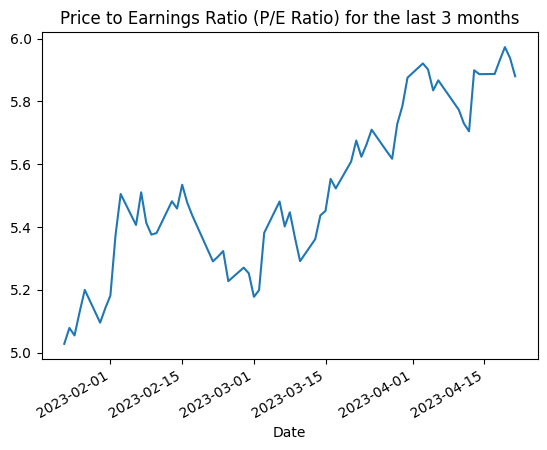

In [69]:
# The historical P/E ratio data for the last 30 days
pe_ratio = stock.history(period="3mo", interval="1d", auto_adjust=False)["Close"] / stock.info["trailingPE"]

print("The daily P/E ratio data for", stock_ticker, "over the last 3 months is:\n", pe_ratio)
pe_ratio.plot(title='Price to Earnings Ratio (P/E Ratio) for the last 3 months')

This code retrieves the closing price data for the last 3 months for the stock, then divides each closing price by the current trailing P/S ratio to calculate the corresponding historical P/S ratio data for the same time period. The resulting ps_ratio_history variable contains the daily P/S ratio data for the last 3 months for the given stock.

How is trailing p/s ratio calculated here?

The priceToSalesTrailing12Months attribute gives the current trailing P/S (price-to-sales) ratio for a stock. It represents the current market capitalization(a measure of the total value of a publicly traded company's outstanding shares of stock. It is calculated by multiplying the company's current share price by the total number of outstanding shares.) of the company divided by its revenue over the past 12 months.

The daily P/S ratio data for AAPL over the last 3 months is:
 Date
2023-01-23 00:00:00-05:00    20.944779
2023-01-24 00:00:00-05:00    21.155547
2023-01-25 00:00:00-05:00    21.056100
2023-01-26 00:00:00-05:00    21.367801
2023-01-27 00:00:00-05:00    21.660204
                               ...    
2023-04-17 00:00:00-04:00    24.524879
2023-04-18 00:00:00-04:00    24.708931
2023-04-19 00:00:00-04:00    24.881109
2023-04-20 00:00:00-04:00    24.735648
2023-04-21 00:00:00-04:00    24.493710
Name: Close, Length: 63, dtype: float64


<Axes: title={'center': 'Price to Sales Ratio (P/S Ratio) for the last 3 months'}, xlabel='Date'>

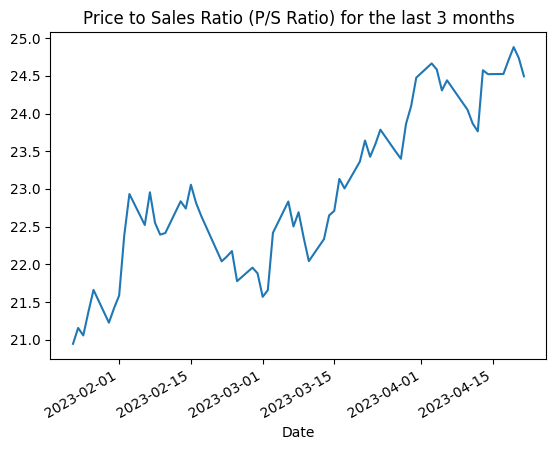

In [70]:
# The historical P/S ratio data for the last 3 months
ps_ratio = stock.history(period="3mo", interval="1d", auto_adjust=False)["Close"] / stock.info["priceToSalesTrailing12Months"]

print("The daily P/S ratio data for", stock_ticker, "over the last 3 months is:\n", ps_ratio)
ps_ratio.plot(title='Price to Sales Ratio (P/S Ratio) for the last 3 months')

3.Price to Book Ratio (P/B Ratio) = Market Price per Share / Book Value per Share

Book value is the value of a company's assets that shareholders would theoretically receive if a company were to be liquidated and all of its debts were paid off. It is calculated by subtracting a company's liabilities from its assets, which provides an estimate of the net worth of the company.

Date
2023-01-23 00:00:00-05:00    39.345122
2023-01-24 00:00:00-05:00    39.741054
2023-01-25 00:00:00-05:00    39.554241
2023-01-26 00:00:00-05:00    40.139776
2023-01-27 00:00:00-05:00    40.689059
                               ...    
2023-04-17 00:00:00-04:00    46.140742
2023-04-18 00:00:00-04:00    46.487015
2023-04-19 00:00:00-04:00    46.810948
2023-04-20 00:00:00-04:00    46.537278
2023-04-21 00:00:00-04:00    46.082101
Name: Close, Length: 63, dtype: float64
Price to Book Ratio (P/B Ratio) for the last day: 46.08


<Axes: title={'center': 'Price to Book Ratio (P/B Ratio) for the last 3 months'}, xlabel='Date'>

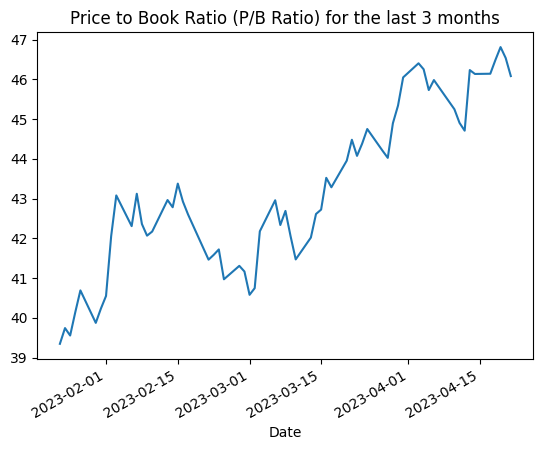

In [71]:
#The historical prices for this ticker for the last 3 months
tickerDF = stock.history(period='3mo')

# get the book value per share
book_value_per_share = stock.info['bookValue']

# calculate the P/B ratio for each day in the last 3 months
pb_ratio = tickerDF['Close'] / book_value_per_share
print(pb_ratio)

# print the P/B ratio for the last day
print('Price to Book Ratio (P/B Ratio) for the last day: {:.2f}'.format(pb_ratio[-1]))

# plot the P/B ratio for the last 3 months
pb_ratio.plot(title='Price to Book Ratio (P/B Ratio) for the last 3 months')


Price to Cash Flow Ratio (P/CF Ratio) = Market Price per Share / Operating Cash Flow per Share

calculates the operating cash flow per share by dividing the company's total operating cash flow by its outstanding shares, and then divides the closing price of the stock for each day 

Date
2023-01-23 00:00:00-05:00    20.416016
2023-01-24 00:00:00-05:00    20.621463
2023-01-25 00:00:00-05:00    20.524527
2023-01-26 00:00:00-05:00    20.828359
2023-01-27 00:00:00-05:00    21.113379
                               ...    
2023-04-17 00:00:00-04:00    23.942234
2023-04-18 00:00:00-04:00    24.121914
2023-04-19 00:00:00-04:00    24.290001
2023-04-20 00:00:00-04:00    24.147995
2023-04-21 00:00:00-04:00    23.911806
Name: Close, Length: 63, dtype: float64
Price to Cash Flow Ratio (P/CF Ratio) for the last day: 23.91


<Axes: title={'center': 'Price to Cash Flow Ratio (P/CF Ratio) for the last 3 months'}, xlabel='Date'>

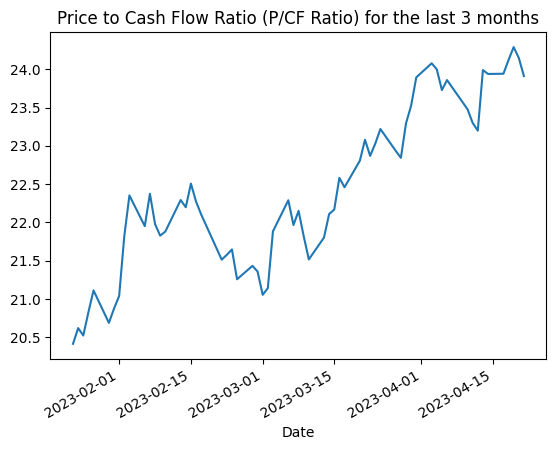

In [72]:
# The operating cash flow per share
operating_cash_flow_per_share = stock.info['operatingCashflow'] / stock.info['sharesOutstanding']

# The P/CF ratio for each day in the last 3 months
pcf_ratio = tickerDF['Close'] / operating_cash_flow_per_share
print(pcf_ratio)

# The P/CF ratio for the last day
print('Price to Cash Flow Ratio (P/CF Ratio) for the last day: {:.2f}'.format(pcf_ratio[-1]))

# plotting the P/CF ratio for the last 3 months
pcf_ratio.plot(title='Price to Cash Flow Ratio (P/CF Ratio) for the last 3 months')


In [74]:
tickerSymbol = 'AAPL'
tickerData = yf.Ticker(tickerSymbol)

dailyPrices = tickerData.history(period='3mo')

# EBITDA and enterprise value data for the last 4 quarters
financials = tickerData.financials
ebitda = financials['EBITDA']
enterpriseValue = financials['Total Enterprise Value']

# The EV/EBITDA ratio
evEbitdaRatio = enterpriseValue / ebitda

# selecting the last 60 rows (corresponding to the last 3 months of daily data) and calculate the mean
evEbitdaRatioLast3Months = evEbitdaRatio.tail(60).mean()

print(f'The daily EV/EBITDA ratio for the last 3 months for {tickerSymbol} is {evEbitdaRatioLast3Months:.2f}.')


Exception: ignored

In [75]:
# The dividend data for the last 5 years
dividendData = tickerData.dividends.to_frame()

# The total dividends paid over the last 5 years
totalDividends = dividendData.sum()[0]

# The current stock price
currentPrice = tickerData.info['regularMarketPrice']

# The dividend yield
dividendYield = (totalDividends / currentPrice) * 100

print(f'The current dividend yield for {tickerSymbol} is {dividendYield:.2f}%.')


KeyError: ignored

6.Dividend Yield = Dividend per Share / Market Price per Share

The values for dividend yield are typically there when a company pays a dividend to its shareholders. Dividends are usually paid out on a regular basis, such as quarterly or annually, and the dividend yield is calculated as the annual dividend payment divided by the current stock price. However, not all companies pay dividends, so their dividend yield will be 0 or null. Additionally, even for companies that do pay dividends, the dividend yield may fluctuate over time based on changes in the stock price and dividend payout.

In [76]:

# get the dividend data for the last 5 years
dividendData = tickerData.dividends.to_frame()

# calculate the total dividends paid over the last 5 years
totalDividends = dividendData.sum()[0]

# get the current stock price
currentPrice = tickerData.info['regularMarketOpen']

# calculate the dividend yield
dividendYield = (totalDividends / currentPrice) * 100

print(f'The current dividend yield for {tickerSymbol} is {dividendYield:.2f}%.')


The current dividend yield for AAPL is 0.14%.


In [77]:
from datetime import datetime, timedelta

# The dividend data for the last 3 months
endDate = datetime.now()
startDate = endDate - timedelta(days=90)
dividendData = tickerData.dividends.loc[startDate:endDate]

# The current stock price
currentPrice = tickerData.info['regularMarketOpen']

# The most recent dividend payout
mostRecentDividend = dividendData.iloc[-1]

# The dividend yield
dividendYield = (mostRecentDividend / currentPrice) * 100

print(f'The current dividend yield for {tickerSymbol} is {dividendYield:.2f}%.')


The current dividend yield for AAPL is 0.14%.


<ipython-input-77-6081ad0e7714>:6: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  dividendData = tickerData.dividends.loc[startDate:endDate]


In [78]:
import pandas as pd

# Defining the date range
startDate = pd.Timestamp.today() - pd.DateOffset(months=3)
endDate = pd.Timestamp.today()

# Get the dividends and stock prices
dividendData = tickerData.dividends.loc[startDate:endDate]
stockData = tickerData.history(start=startDate, end=endDate)

# Calculate the dividend yield
dividendYield = sum(dividendData) / (sum(stockData['Close']) / len(stockData))

print(f"Dividend Yield for {tickerSymbol} over the last 3 months: {dividendYield:.2%}")


Dividend Yield for AAPL over the last 3 months: 0.15%


<ipython-input-78-f569956a051f>:8: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  dividendData = tickerData.dividends.loc[startDate:endDate]


In [79]:
# The historical prices and financials for this ticker
tickerDF = tickerData.history(period='3mo')
dividendData = tickerData.dividends

# calculating daily dividend yield
daily_dividend_yield = dividendData / tickerDF['Close'] * 100

print(daily_dividend_yield)


Date
2023-01-23 00:00:00-05:00   NaN
2023-01-24 00:00:00-05:00   NaN
2023-01-25 00:00:00-05:00   NaN
2023-01-26 00:00:00-05:00   NaN
2023-01-27 00:00:00-05:00   NaN
                             ..
2023-04-17 00:00:00-04:00   NaN
2023-04-18 00:00:00-04:00   NaN
2023-04-19 00:00:00-04:00   NaN
2023-04-20 00:00:00-04:00   NaN
2023-04-21 00:00:00-04:00   NaN
Length: 63, dtype: float64


7.Dividend Payout Ratio = Dividends per Share / Earnings per Share

The Dividend Payout Ratio is the proportion of earnings paid out as dividends to shareholders.
where there is no dividend data will have a value of 0 in the output.

In [80]:
# Set the start and end date for the data
startDate = '2022-01-01'
endDate = '2022-04-30'

# Get the historical prices and dividends for this ticker
tickerDF = tickerData.history(start=startDate, end=endDate, interval='1d')
dividendData = tickerData.dividends.loc[startDate:endDate]

# Calculate the daily earnings per share (EPS)
earnings = tickerData.financials.loc['Net Income']
outstandingShares = tickerData.info['sharesOutstanding']
EPS = earnings / outstandingShares

# Calculate the daily Dividend Payout Ratio
dividendPayoutRatio = (dividendData / EPS).fillna(0)

# Print the daily Dividend Payout Ratio for the last 3 months
print(dividendPayoutRatio)


Exception: ignored

8.Return on Equity (ROE) = Net Income / Shareholder’s Equity

In [81]:
# get the trailing 4 quarters financials for this ticker
financials = tickerData.quarterly_financials

# calculate ROE for each quarter
roe = (financials['Net Income'] / financials['Total Stockholder Equity']) * 100

# print ROE
print(roe)


Exception: ignored

In [82]:
# get the financial statements for this ticker
financials = tickerData.financials

# extract the net income and total assets
net_income = financials.loc['Net Income']
total_assets = financials.loc['Total Assets']

# calculate the return on assets
ROA = net_income / total_assets

print('ROA:', ROA)


Exception: ignored

In [83]:
dataSource = 'yahoo'

tickerData = yf.Ticker(tickerSymbol, data_source=dataSource)

# The financials for this ticker
financials = tickerData.financials

# the ROI for the latest fiscal year
netIncome = financials.loc['Net Income']
totalInvestment = 1000000 # we can replace it with investment amount
ROI = (netIncome / totalInvestment) * 100

print('ROI:', ROI)


TypeError: ignored

In [84]:
# balance sheet data
balanceSheet = tickerData.balance_sheet

# ctotal debt and total equity
totalDebt = balanceSheet.loc['Total Debt'][0]
totalEquity = balanceSheet.loc['Total Stockholder Equity'][0]

# debt to equity ratio
debtToEquityRatio = totalDebt / totalEquity

print("Debt to Equity Ratio:", debtToEquityRatio)


Exception: ignored

In [85]:
# the financial statements for the ticker
financials = tickerData.financials

# the debt to equity ratio for the most recent fiscal year
totalDebt = financials.loc['Total Debt'][0]
totalEquity = financials.loc['Total Stockholder Equity'][0]
debtToEquityRatio = totalDebt / totalEquity


Exception: ignored

In [86]:
# the financial statements for this ticker
financials = yf.get_financials(tickerSymbol)

print("Income Statement:")
print(financials['income_statement'])

print("Balance Sheet:")
print(financials['balance_sheet'])

print("Cash Flow Statement:")
print(financials['cashflow'])


AttributeError: ignored

In [ ]:
# the balance sheet data
balanceSheet = tickerData.balance_sheet()

# the debt to equity ratio
totalDebt = balanceSheet.loc['Total Liab'].tail(1).iloc[0]
totalEquity = balanceSheet.loc['Total Stockholder Equity'].tail(1).iloc[0]
debtToEquityRatio = totalDebt / totalEquity

# printing the debt to equity ratio
print(f"Debt to Equity Ratio: {debtToEquityRatio:.2f}")


In [ ]:
# the historical prices for this ticker
tickerDF = tickerData.history(period='3mo')

# the financial data for this ticker
financials = tickerData.financials

# checking if 'Net Income' is in the financials data
if 'Net Income' in financials.index:
    # calculate EPS
    netIncome = financials.loc['Net Income'][0]
    sharesOutstanding = tickerData.info['sharesOutstanding']
    EPS = netIncome / sharesOutstanding
    print(f"EPS: {EPS}")
else:
    print("Net Income not found in financials data.")
